In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting as pd_plotting
from io import BytesIO

def parse_date(date_string):
    formats = [
        "%b %d, %Y",  # Feb 22, 1732
        "%B %d, %Y",  # July 4, 1826 (full month name)
    ]
    
    for fmt in formats:
        try:
            return pd.to_datetime(date_string, format=fmt)
        except ValueError:
            continue
    return pd.NaT 

president_dataset = pd.read_csv("U.S. Presidents Birth and Death Information - Sheet1.csv", index_col=False)


In [2]:
president_dataset.drop(president_dataset.tail(1).index, inplace=True)
# Applying the parse_date function to BIRTH DATE and DEATH DATE columns
president_dataset["BIRTH DATE"] = president_dataset["BIRTH DATE"].apply(lambda x: parse_date(x) if pd.notnull(x) else pd.Timestamp.today())
president_dataset["DEATH DATE"] = president_dataset["DEATH DATE"].apply(lambda x: parse_date(x) if pd.notnull(x) else pd.Timestamp.today())


In [3]:
# Calculate the difference in years, months, and days
#Using 365.25 to account for leap years and using 30.5 to account for months which have 31 days
lived_years = round((president_dataset["DEATH DATE"] - president_dataset["BIRTH DATE"]).dt.days / 365.25, 1)
lived_months = round((president_dataset["DEATH DATE"] - president_dataset["BIRTH DATE"]).dt.days / 30.5, 1)
lived_days = (president_dataset["DEATH DATE"] - president_dataset["BIRTH DATE"]).dt.days
president_dataset["YEAR OF BIRTH"] = president_dataset["BIRTH DATE"].dt.year
president_dataset["DEATH DATE"] = president_dataset["DEATH DATE"].dt.date
president_dataset["BIRTH DATE"] = president_dataset["BIRTH DATE"].dt.date


In [4]:
# Adding the new columns to the DataFrame
president_dataset["LIVED YEARS"] = lived_years
president_dataset["LIVED MONTHS"] = lived_months
president_dataset["LIVED DAYS"] = lived_days

# Display the DataFrame to verify
president_dataset

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,YEAR OF BIRTH,LIVED YEARS,LIVED MONTHS,LIVED DAYS
0,George Washington,1732-02-22,"Westmoreland Co., Va.",1799-12-14,"Mount Vernon, Va.",1732,67.8,812.0,24767
1,John Adams,1735-10-30,"Quincy, Mass.",1826-07-04,"Quincy, Mass.",1735,90.7,1085.9,33119
2,Thomas Jefferson,1743-04-13,"Albemarle Co., Va.",1826-07-04,"Albemarle Co., Va.",1743,83.2,996.6,30397
3,James Madison,1751-03-16,"Port Conway, Va.",1836-06-28,"Orange Co., Va.",1751,85.3,1021.3,31150
4,James Monroe,1758-04-28,"Westmoreland Co., Va.",1831-07-04,"New York, New York",1758,73.2,876.4,26729
5,John Quincy Adams,1767-07-11,"Quincy, Mass.",1848-02-23,"Washington, D.C.",1767,80.6,965.4,29446
6,Andrew Jackson,1767-03-15,"Waxhaws, No/So Carolina",1845-06-08,"Nashville, Tennessee",1767,78.2,936.9,28574
7,Martin Van Buren,1782-12-05,"Kinderhook, New York",1862-07-24,"Kinderhook, New York",1782,79.6,953.6,29085
8,William Henry Harrison,1773-02-09,"Charles City Co., Va.",1841-04-04,"Washington, D.C.",1773,68.1,816.1,24890
9,John Tyler,1790-03-29,"Charles City Co., Va.",1862-01-18,"Richmond, Va.",1790,71.8,859.9,26227


In [5]:
#Calculate longest lived 10 presidents
longest_lived_10_presidents = president_dataset.sort_values("LIVED YEARS", ascending=False).head(10).style.hide().format({"LIVED YEARS": "{:.1f}", "LIVED MONTHS": "{:.1f}", "LIVED DAYS": "{:.1f}"})

In [6]:
longest_lived_10_presidents

PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,YEAR OF BIRTH,LIVED YEARS,LIVED MONTHS,LIVED DAYS
Jimmy Carter,1924-10-01,"Plains, Georgia",2024-08-10,nan,1924,99.9,1195.8,36473.0
George Bush,1924-06-12,"Milton, Mass.",2018-11-30,"Houston, Texas",1924,94.5,1131.3,34504.0
Gerald Ford,1913-07-14,"Omaha, Nebraska",2006-12-26,"Rancho Mirage, Cal.",1913,93.5,1119.1,34133.0
Ronald Reagan,1911-02-06,"Tampico, Illinois",2004-06-05,"Los Angeles, Cal.",1911,93.3,1117.6,34088.0
John Adams,1735-10-30,"Quincy, Mass.",1826-07-04,"Quincy, Mass.",1735,90.7,1085.9,33119.0
Herbert Hoover,1874-08-10,"West Branch, Iowa",1964-10-20,"New York, New York",1874,90.2,1080.1,32943.0
Harry S. Truman,1884-05-08,"Lamar, Missouri",1972-12-26,"Kansas City, Missouri",1884,88.6,1061.4,32373.0
James Madison,1751-03-16,"Port Conway, Va.",1836-06-28,"Orange Co., Va.",1751,85.3,1021.3,31150.0
Thomas Jefferson,1743-04-13,"Albemarle Co., Va.",1826-07-04,"Albemarle Co., Va.",1743,83.2,996.6,30397.0
Joe Biden,1942-11-20,"Scranton, Pa.",2024-08-10,nan,1942,81.7,978.7,29849.0


In [7]:
##Calculate shortest lived 10 presidents
shortest_lived_10_presidents = president_dataset.sort_values("LIVED YEARS", ascending=True).head(10).style.hide().format({"LIVED YEARS": "{:.1f}", "LIVED MONTHS": "{:.1f}", "LIVED DAYS": "{:.1f}"})

In [8]:
shortest_lived_10_presidents

PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,YEAR OF BIRTH,LIVED YEARS,LIVED MONTHS,LIVED DAYS
John F. Kennedy,1917-05-29,"Brookline, Mass.",1963-11-22,"Dallas, Texas",1917,46.5,556.7,16978.0
James A. Garfield,1831-11-19,"Cuyahoga Co., Ohio",1881-09-19,"Elberon, New Jersey",1831,49.8,596.8,18202.0
James K. Polk,1795-11-02,"Mecklenburg Co., N.C.",1849-06-15,"Nashville, Tennessee",1795,53.6,642.1,19583.0
Abraham Lincoln,1809-02-12,"LaRue Co., Kentucky",1865-04-15,"Washington, D.C.",1809,56.2,672.7,20516.0
Chester Arthur,1829-10-05,"Fairfield, Vermont",1886-11-18,"New York, New York",1829,57.1,684.0,20863.0
Warren G. Harding,1865-11-02,"Morrow County, Ohio",1923-08-02,"San Francisco, Cal.",1865,57.7,691.5,21091.0
William McKinley,1843-01-29,"Niles, Ohio",1901-09-14,"Buffalo, New York",1843,58.6,702.0,21412.0
Theodore Roosevelt,1858-10-27,"New York, New York",1919-01-06,"Oyster Bay, New York",1858,60.2,720.8,21985.0
Calvin Coolidge,1872-07-04,"Plymouth, Vermont",1933-01-05,"Northampton, Mass.",1872,60.5,724.6,22099.0
Barack Obama,1961-08-04,"Honolulu, Hawaii",2024-08-10,nan,1961,63.0,754.7,23017.0


In [9]:
#calculate the mean, weighted average, median, mode, max, min and standard deviation of lived_days
mean_lived_days = lived_days.mean()
median_lived_days = lived_days.median()
mode_lived_days = lived_days.mode()[0]  # Mode can have multiple values, pick the first
max_lived_days = lived_days.max()
min_lived_days = lived_days.min()
std_lived_days = lived_days.std()

# Assuming equal weights for all presidents since no additional weighting criteria are given
weighted_avg_lived_days = np.average(lived_days)



In [10]:
statistics_table = pd.DataFrame({
    "Measure": ["Mean", "Weighted Average", "Median", "Mode", "Max", "Min", "Standard Deviation"],
    "Lived Days": [mean_lived_days, weighted_avg_lived_days, median_lived_days, mode_lived_days, max_lived_days, min_lived_days, std_lived_days]
})

# Display the statistics table
statistics_table

,Measure,Lived Days
0,Mean,26504.044444
1,Weighted Average,26504.044444
2,Median,26227.000000
3,Mode,16978.000000
4,Max,36473.000000
5,Min,16978.000000
6,Standard Deviation,4632.047677


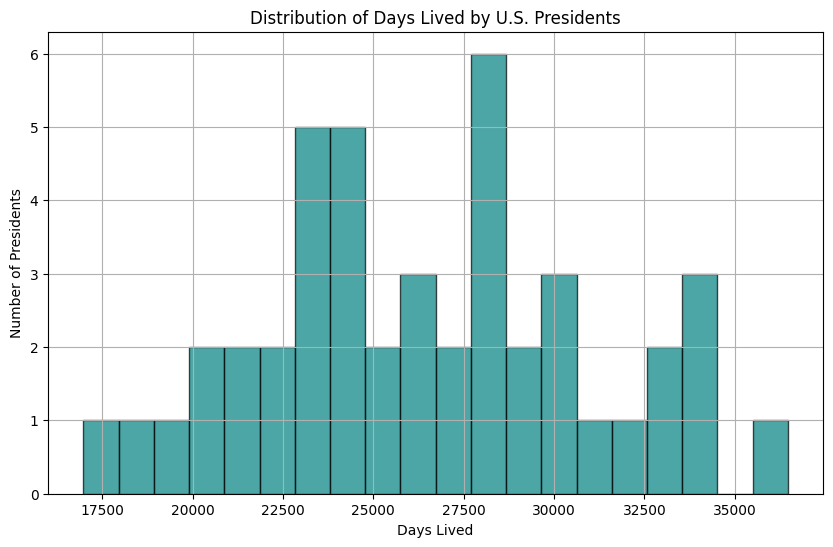

In [11]:
# Plotting the distribution of lived_days
plt.figure(figsize=(10, 6))
plt.hist(lived_days.dropna(), bins=20, alpha = 0.7, color='teal', edgecolor='black')
plt.title('Distribution of Days Lived by U.S. Presidents')
plt.xlabel('Days Lived')
plt.ylabel('Number of Presidents')
plt.grid(True)
plt.show()